In [222]:
import numpy as np
#import quadpy

X = np.random.normal(size=1000)
e1 = np.random.normal(loc=2, size=1000)
e2 = np.random.normal(loc=2, size=1000)
Y1 = X + e1
Y2 = X + e2

In [226]:
import numpy as np
import util


class Kotlarski():
    def __init__(self, Y1, Y2, loc=0, T=2):
        self.Y1 = Y1
        self.Y2 = Y2
        self.loc = 0
        self.T = T
        
    def ecf(self, t1, t2):
        return np.mean(np.exp(1j*t1*self.Y1 + 1j*t2*self.Y2))

    def d1ecf(self, t1, t2):
        return np.mean(1j*Y1 * np.exp(1j*t1*self.Y1 + 1j*t2*self.Y2))

    def deconvolution(self):
        integrand = lambda u: self.d1ecf(0,u) / self.ecf(0,u)
        def phi_x(t):
            if t>=0:
                return np.exp(util.complex_quadrature(integrand, 0, t)[0] - 1j*t*self.loc)
            else:
                return np.exp(-util.complex_quadrature(integrand, t, 0)[0] - 1j*t*self.loc)
        # phi_x  = lambda t: np.exp(util.complex_quadrature(integrand, 0, t)[0] - 1j*t*self.loc)
        phi_e1 = lambda t: self.ecf(t,0)/phi_x(t)
        phi_e2 = lambda t: self.ecf(0,t)/phi_x(t)
        return (phi_x, phi_e1, phi_e2)

    def densities(self):
        def integrand(func, t, u):
            return np.exp(-1j*t*u) * func(t)

        def density(func, u):
            return 1/(2*np.pi) * util.complex_quadrature(lambda t : integrand(func, t, u), -self.T, self.T)[0]
            
        lst = []
        for func in self.deconvolution():
            lst.append(lambda t: density(func, t))
        
        return lst

    def fx(self, x):
        return self.densities()[0](x)

    def fe1(self, x):
        return self.densities()[1](x)

    def fe2(self, x):
        return self.densities()[2](x)



In [227]:
kot = Kotlarski(Y1, Y2)

kot.fx(2)

(0.06039960097149817+0j)

/Users/xy38/opt/anaconda3/envs/salvage-car/lib/python3.11/site-packages/matplotlib/cbook/__init__.py:1340: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


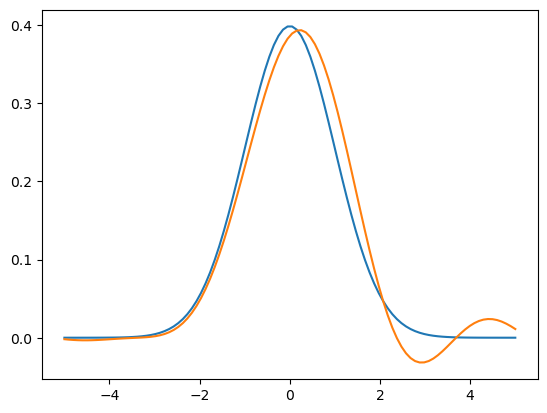

In [228]:
import matplotlib.pyplot as plt

x_plot = np.linspace(-5,5,100)
plt.plot(x_plot, scipy.stats.norm.pdf(x_plot))

est_plot = []
for x in x_plot:
    est_plot.append(kot.fx(x))
plt.plot(x_plot, est_plot)

In [229]:
est_plot

[(-0.0019188934591826187+0j),
 (-0.002471232931965087+0j),
 (-0.0028957100606682314+0j),
 (-0.0031818134932016396+0j),
 (-0.0033269351832593713+0j),
 (-0.003336298656289976+0j),
 (-0.0032224065294702547+0j),
 (-0.003004009716684496+0j),
 (-0.0027046228654647422+0j),
 (-0.0023506325215892397+0j),
 (-0.0019690653812021006+0j),
 (-0.0015851028695446877+0j),
 (-0.0012194443325754536+0j),
 (-0.0008856335840114197+0j),
 (-0.0005874717772262937+0j),
 (-0.0003166430792953814+0j),
 (-5.067809540604986e-05+0j),
 (0.0002486267032813701+0j),
 (0.0006362270868610398+0j),
 (0.001184196864824543+0j),
 (0.0019813725070111582+0j),
 (0.0031322324039586877+0j),
 (0.004754994163324776+0j),
 (0.006978942864913506+0j),
 (0.00994103361516719+0j),
 (0.013781841932930137+0j),
 (0.01864096431608796+0j),
 (0.024651997654041337+0j),
 (0.031937248893820214+0j),
 (0.04060234456854426+0j),
 (0.050730922625641696+0j),
 (0.062379595791840436+0j),
 (0.07557337602734834+0j),
 (0.09030174322107895+0j),
 (0.10651552816762

In [89]:
a = 1
b = 2
g(1)

4